In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

## Understanding the data set

🧠 Alzheimer's Disease Dataset 🧠
About Dataset
This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

**Table of Contents**
~Patient Information
~Patient ID
~Demographic Details
~Lifestyle Factors
~Medical History
~Clinical Measurements
~Cognitive and Functional Assessments
~Symptoms
~Diagnosis Information
~Confidential Information


**Patient Information**

Patient ID

PatientID: A unique identifier assigned to each patient (4751 to 6900).


**Demographic Details**

~Age: The age of the patients ranges from 60 to 90 years.
~Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
~Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
~EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher


**Lifestyle Factors**
~BMI: Body Mass Index of the patients, ranging from 15 to 40.
~Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
~AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
~PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
~DietQuality: Diet quality score, ranging from 0 to 10.
~SleepQuality: Sleep quality score, ranging from 4 to 10.


**Medical History**
~FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
~CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
~Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
~Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
~HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
~Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

    
**Clinical Measurements**
~SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
~DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
~CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
~CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
~CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
~CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.


**Cognitive and Functional Assessments**
~MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
~FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
~MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
~BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
~ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.


**Symptoms**
~Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
~Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
~PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
~DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
~Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.


**Diagnosis Information**
Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.


**Confidential Information**
~DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

In [3]:
df=pd.read_csv("alzheimers_disease_data.csv")
df.shape

(2149, 35)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df.iloc[:, :20]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192


In [6]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [7]:
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

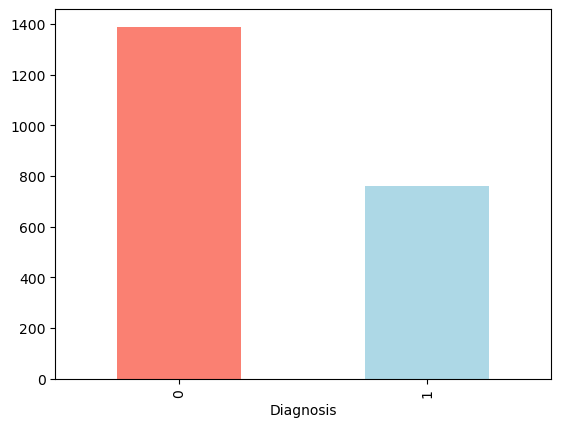

In [8]:
df['Diagnosis'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show();

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [128]:
plt.savefig('null.png');
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [11]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.Gender.value_counts()

Gender
1    1088
0    1061
Name: count, dtype: int64

In [13]:
# compare diagnosis with gender column
pd.crosstab(df.Diagnosis, df.Gender)

Gender,0,1
Diagnosis,,
0,675,714
1,386,374


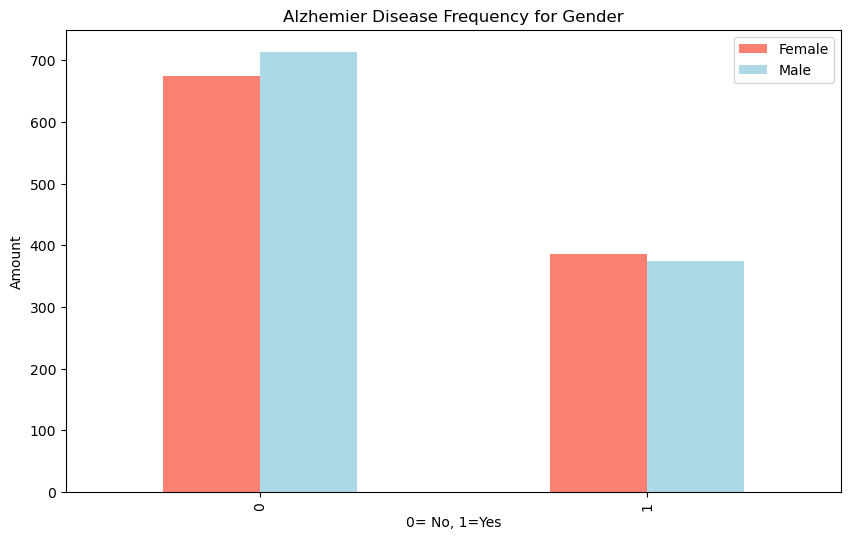

In [14]:
pd.crosstab(df.Diagnosis, df.Gender).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Alzhemier Disease Frequency for Gender")
plt.xlabel("0= No, 1=Yes")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.show();

In [15]:
#this shows that more female are prone to alzhemier disease though almost a tie

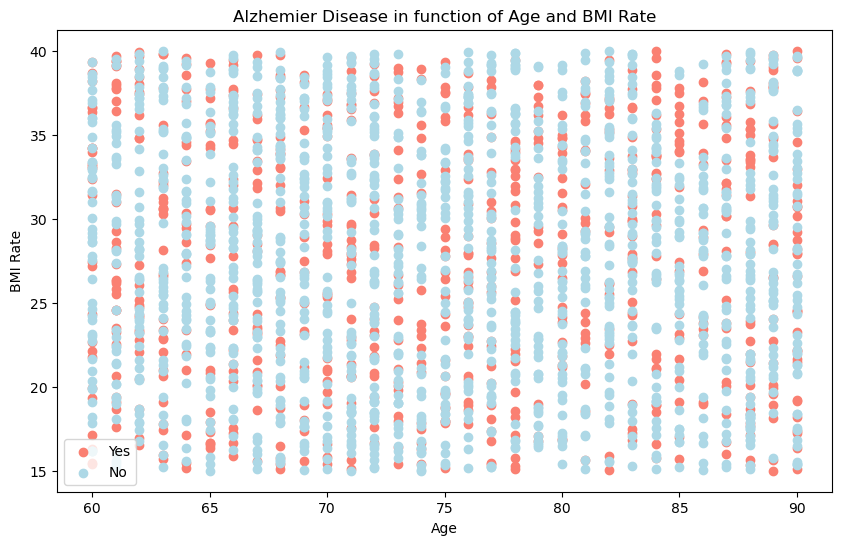

In [16]:
plt.figure(figsize=(10, 6))

plt.scatter(df.Age[df.Diagnosis==1],
           df.BMI[df.Diagnosis==1],
           c="salmon")

plt.scatter(df.Age[df.Diagnosis==0],
           df.BMI[df.Diagnosis==0],
           c="lightblue");

#Add some helpful info
plt.title("Alzhemier Disease in function of Age and BMI Rate")
plt.xlabel("Age")
plt.ylabel("BMI Rate")
plt.legend(["Yes", "No"]);
plt.show();

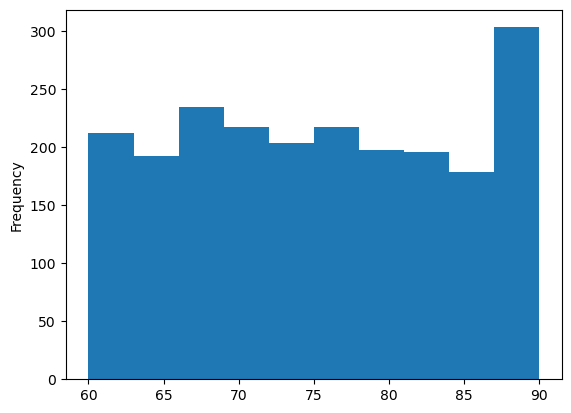

In [17]:
df.Age.plot.hist();
plt.show();

In [18]:
# this shows that people in their late 80s suffer more from this disease

In [19]:
pd.crosstab(df.Ethnicity, df.Diagnosis)

Diagnosis,0,1
Ethnicity,,
0,815,463
1,308,146
2,122,84
3,144,67


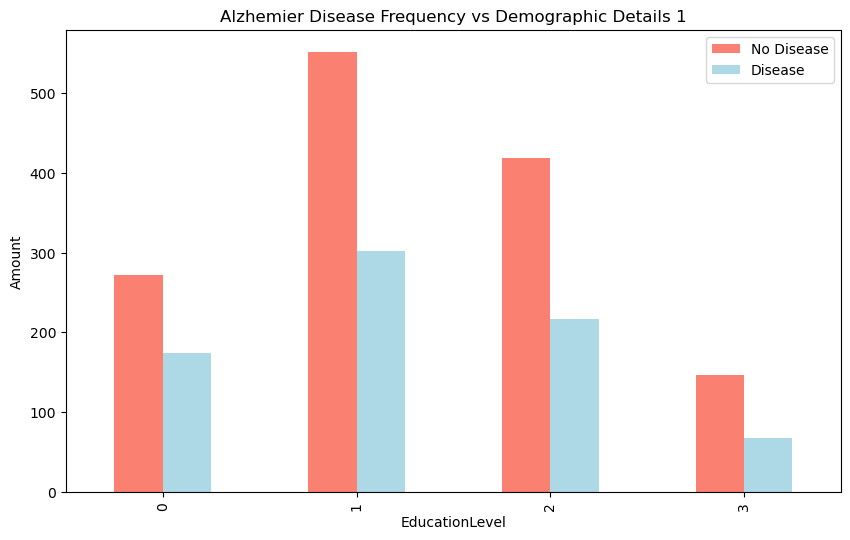

In [20]:
pd.crosstab(df["EducationLevel"], df["Diagnosis"]).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Alzhemier Disease Frequency vs Demographic Details 1")
plt.xlabel("EducationLevel")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.show();

In [21]:
pd.crosstab(df.HeadInjury, df.Diagnosis)

Diagnosis,0,1
HeadInjury,,
0,1254,696
1,135,64


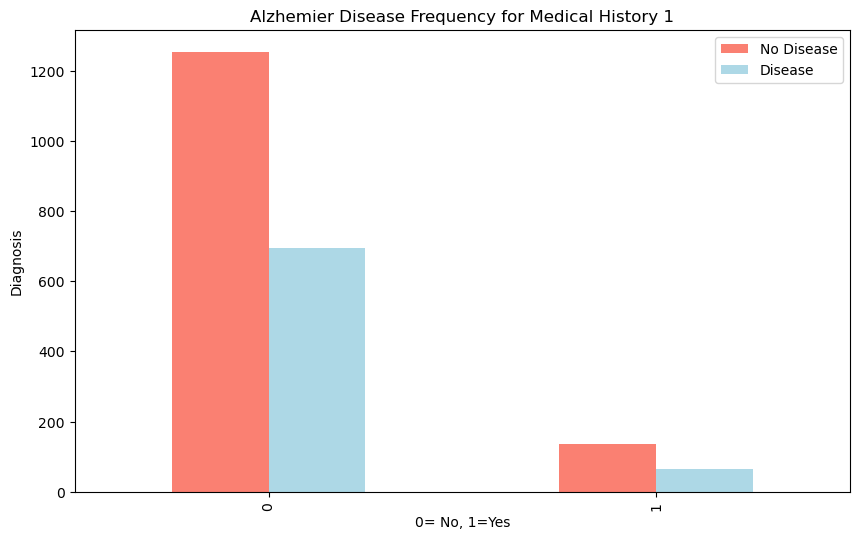

In [22]:
pd.crosstab(df["HeadInjury"], df["Diagnosis"]).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Alzhemier Disease Frequency for Medical History 1")
plt.xlabel("0= No, 1=Yes")
plt.ylabel("Diagnosis")
plt.legend(["No Disease", "Disease"]);
plt.show();

In [23]:
pd.crosstab(df.FamilyHistoryAlzheimers, df.Diagnosis)

Diagnosis,0,1
FamilyHistoryAlzheimers,,
0,1024,583
1,365,177


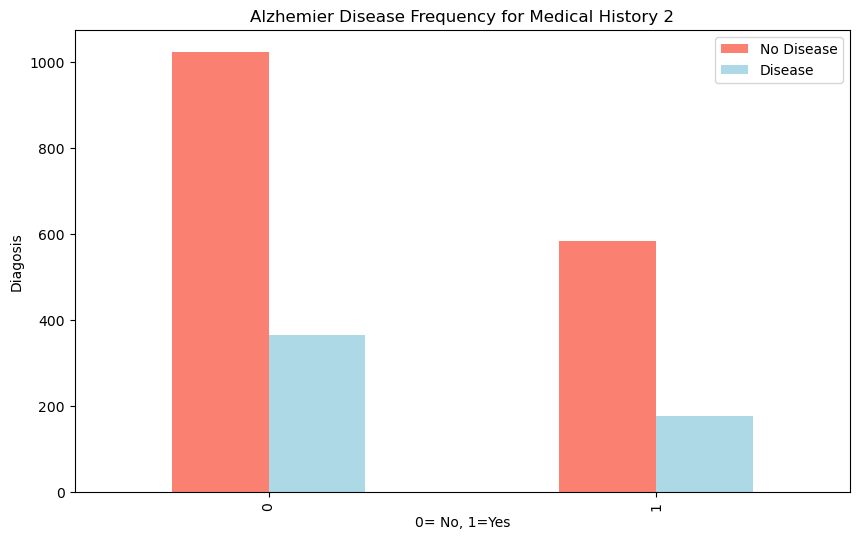

In [24]:
pd.crosstab(df["Diagnosis"], df["FamilyHistoryAlzheimers"],).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);
plt.title("Alzhemier Disease Frequency for Medical History 2")
plt.xlabel("0= No, 1=Yes")
plt.ylabel("Diagosis")
plt.legend(["No Disease", "Disease"]);
plt.show();

In [25]:
# those that do not have an history or head injury and are diagnosed to have the alzheimers disease are more than those who have the history. it can be said that family history or head injury are not determinants for having the disease.

In [26]:
X=df.drop(["Diagnosis", "PatientID", "DoctorInCharge"], axis=1)

y=df["Diagnosis"]
X

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,1.201190,0.238667,0,0,4.492838,1,0,0,0,0
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,6.458060,8.687480,0,1,9.204952,0,0,0,0,0
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,17.011003,1.972137,0,0,5.036334,0,0,0,0,0
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,4.030491,5.173891,0,0,3.785399,0,0,0,0,1


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64

In [28]:
df.drop(["PatientID", "DoctorInCharge"], axis=1).corr()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


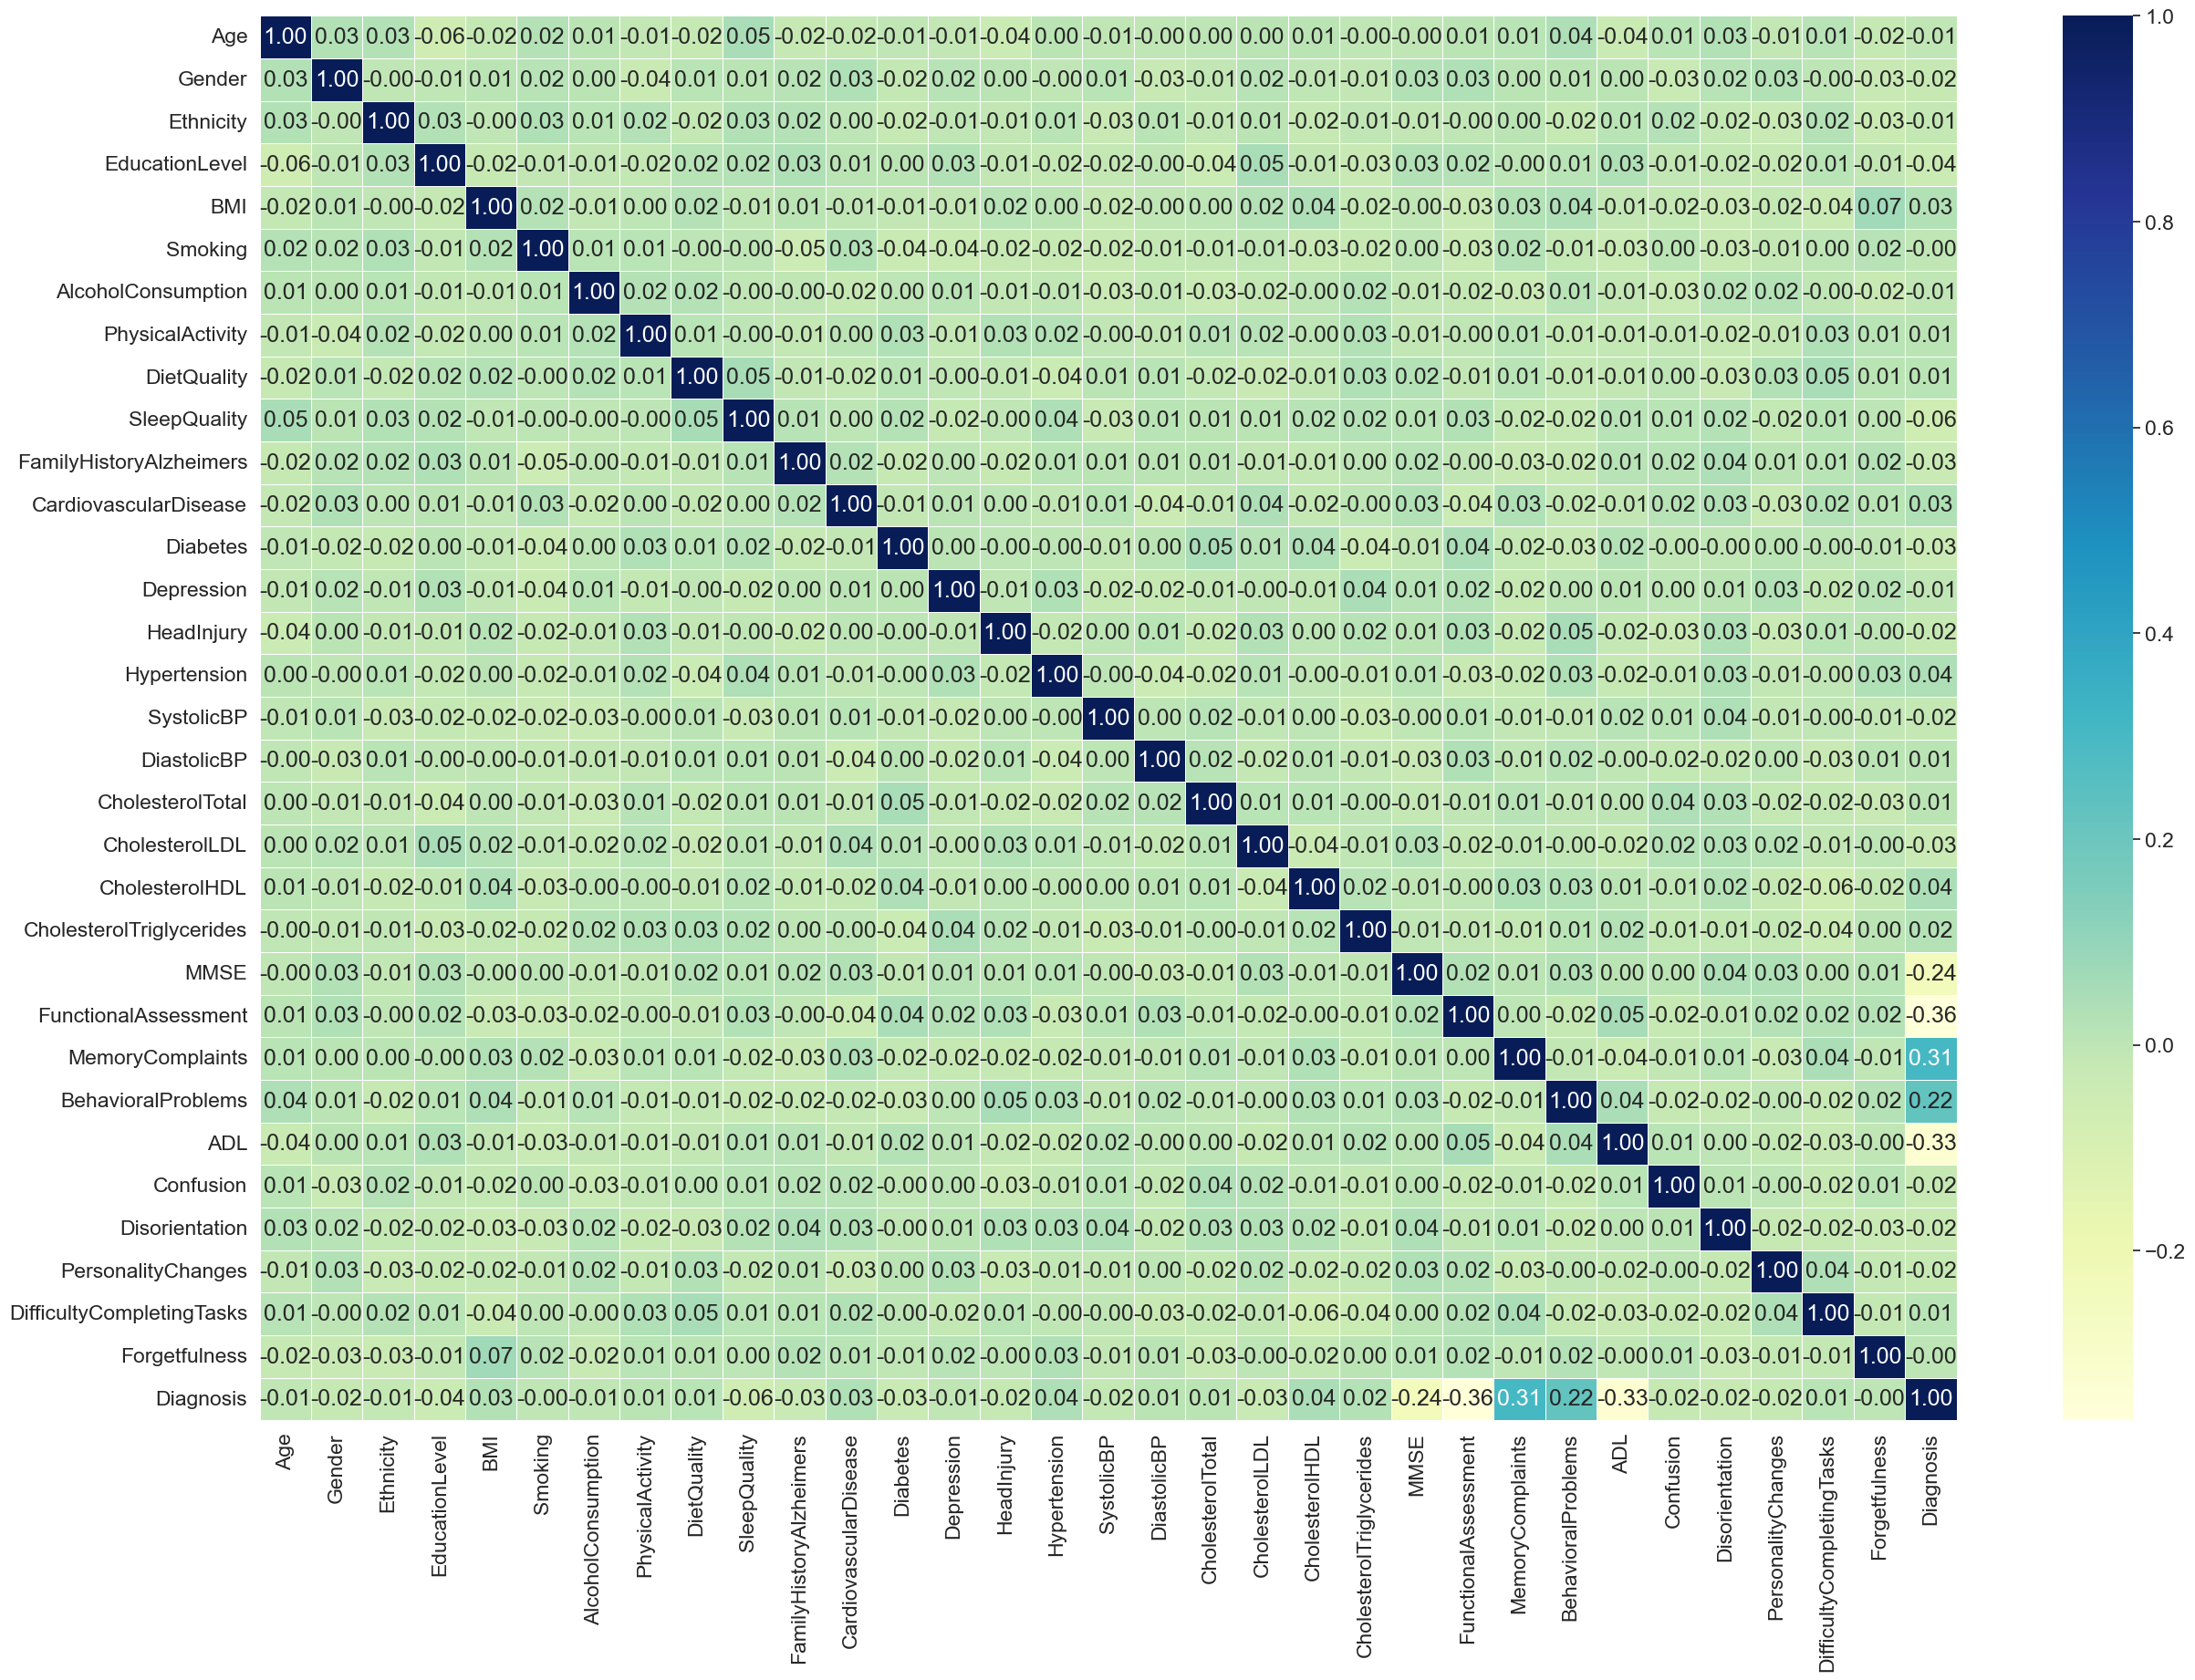

In [127]:
corr_matrix=df.drop(["PatientID", "DoctorInCharge"], axis=1).corr()
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");
bottom,top=ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top-0.5);
plt.savefig('corr_matrix.png');
plt.show();

In [30]:
# split data nto train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2)

In [31]:
X_train

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,7.836104,...,25.399206,3.085543,0,0,6.643693,0,0,0,0,0
630,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,5.218052,...,8.292136,5.616830,0,1,3.884562,0,0,0,0,1
78,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,6.146166,...,21.042238,3.662461,0,0,4.013722,0,0,1,1,0
366,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,6.825155,...,28.609438,4.648135,0,0,9.355700,1,0,1,0,1
1996,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,4.715534,...,2.629135,9.601238,1,0,8.818932,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,82,1,0,2,22.874070,0,16.006145,7.411056,2.341965,6.688947,...,7.325867,5.432951,0,0,0.214825,0,0,1,0,0
1095,82,0,1,3,25.522233,0,15.432489,4.149322,9.605963,5.235691,...,11.671289,0.298203,1,0,5.590417,0,0,0,0,1
1130,85,0,1,2,29.216597,0,9.424858,8.004951,4.276642,7.641721,...,28.463207,1.957638,0,0,4.030134,0,0,0,0,0
1294,89,1,0,1,25.741021,0,0.036260,6.292084,9.072249,8.497493,...,6.230189,5.535547,0,0,3.464861,0,0,0,0,0


In [32]:
y_train, len(y_train)

(1433    0
 630     1
 78      1
 366     0
 1996    1
        ..
 1638    0
 1095    1
 1130    0
 1294    0
 860     0
 Name: Diagnosis, Length: 1719, dtype: int64,
 1719)

In [33]:
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)#fit the model into the data
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [34]:
# now we will be experimenting with the machine learning models
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\USER\desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7581395348837209,
 'KNN': 0.5395348837209303,
 'Random Forest': 0.9255813953488372}

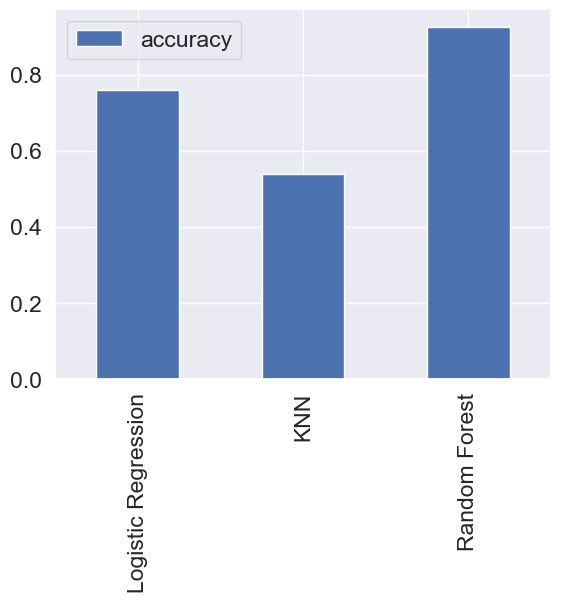

In [121]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.savefig('model.png');
plt.show();

<img src="images/model_compare.png"/>

In [36]:
train_scores=[]
test_scores=[]
neighbors=range(1, 21)

knn= KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.7859220477021525,
 0.7876672484002327,
 0.7393833624200117,
 0.7446189645142525,
 0.7300756253635835,
 0.7271669575334497,
 0.7137870855148342,
 0.7073880162885399,
 0.7033158813263525,
 0.702152414194299,
 0.6974985456660849,
 0.6945898778359512,
 0.6812100058173357,
 0.6823734729493892,
 0.6788830715532286,
 0.675392670157068,
 0.6719022687609075,
 0.6736474694589878,
 0.6660849331006399]

In [38]:
test_scores

[0.5441860465116279,
 0.6093023255813953,
 0.5581395348837209,
 0.5697674418604651,
 0.5395348837209303,
 0.586046511627907,
 0.5534883720930233,
 0.6,
 0.586046511627907,
 0.5930232558139535,
 0.5627906976744186,
 0.6,
 0.586046511627907,
 0.6046511627906976,
 0.5976744186046512,
 0.6069767441860465,
 0.6093023255813953,
 0.627906976744186,
 0.627906976744186,
 0.6232558139534884]

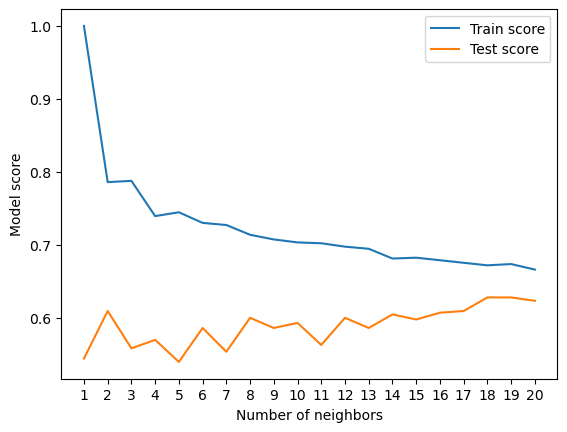

Maximum KNN score on the test data:62.79%


In [39]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show();
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

In [40]:
model_scores

{'Logistic Regression': 0.7581395348837209,
 'KNN': 0.5395348837209303,
 'Random Forest': 0.9255813953488372}

In [41]:
#create a hyperparameter grid for logistic regression
log_reg_grid={"C": np.logspace(-4, 4, 20),
             "solver":["liblinear"]}
#create a hyperparameter grid for randomforestclassifier
rf_grid={"n_estimators": np.arange(10, 1000, 50),
        "max_depth":[None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf":np.arange(1, 20, 2)}

In [42]:
# tuning logistic regression
np.random.seed(42)
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid, 
                              cv=5,
                              n_iter=20,
                              verbose=True)
#fit random hyper parameter for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(3792.690190732246)}

In [44]:
rs_log_reg.score(X_test, y_test)

0.8302325581395349

In [45]:
#tuning forest classifier
np.random.seed(42)
rf_grid={"n_estimators": np.arange(10, 1000, 50),
        "max_depth":[None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf":np.arange(1, 20, 2)}

rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid, 
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [47]:
rs_rf.score(X_test, y_test)

0.9348837209302325

In [48]:
#so far, the random forest classifier is giving us the best accuracy needed

In [49]:
param_grid={'n_estimators':[50, 100],
            'max_depth':[5, 10, None],
            'min_samples_split':[2, 5],
            'min_samples_leaf':[1, 2],
            'max_features':['sqrt', 'log2'],
            'bootstrap':[True, False],
            'criterion':['gini', 'entropy']}

In [50]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

In [51]:
scoring={'accuracy':'accuracy',
         'precision_macro':'precision_macro',
         'recall_macro':'recall_macro',
         'f1_macro':'f1_macro'}

In [52]:
# Set up GridSearchCV
grid_search= GridSearchCV(estimator=rf,
                         param_grid=param_grid,
                         scoring=scoring,
                         refit='accuracy',
                         cv=5,
                         verbose=2,
                         n_jobs=-1,
                         error_score='raise')
grid_search.fit(X_train, y_train)   # Use all available cores

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro'},
             verbose=2)

In [53]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [54]:
grid_search.score(X_test, y_test)

0.9395348837209302

In [55]:
model_scores

{'Logistic Regression': 0.7581395348837209,
 'KNN': 0.5395348837209303,
 'Random Forest': 0.9255813953488372}

In [56]:
print(len(X_test), len(y_test))

430 430


In [57]:
# making predictions with tuned data
y_preds= grid_search.predict(X_test)
print(len(y_preds))

430


In [58]:
assert len(y_test)==len(y_preds)

In [59]:
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [60]:
y_test

1159    0
1822    0
978     0
759     0
874     0
       ..
1103    0
1991    0
445     1
548     0
25      0
Name: Diagnosis, Length: 430, dtype: int64

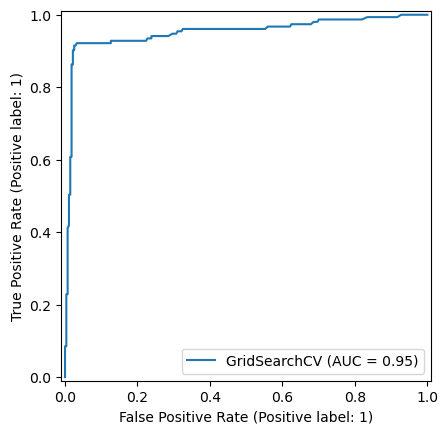

In [61]:
# plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(grid_search, X_test, y_test)
plt.show();

In [62]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[272   5]
 [ 21 132]]


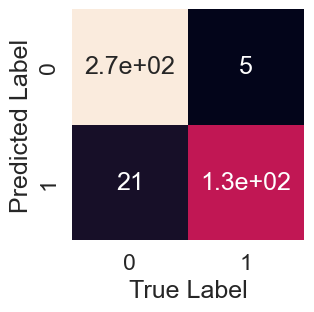

In [63]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax=plt.subplots(figsize=(3, 3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    #bottom, top=ax.get_ylim()
    #ax.set_ylim(bottom+0.5, top-0.5)
# I will need these above commented codes if the matrix didnt come out well

plot_conf_mat(y_test, y_preds)
plt.show();

In [64]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.86      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



In [65]:
# will be using grid search CV because it gives the highest accuracy

In [66]:
grid_search.score(X_test, y_test)

0.9395348837209302

In [67]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [68]:
clf=RandomForestClassifier(n_estimators=50,
                           max_depth= None,
                           max_features= 'sqrt',
                           min_samples_split= 5, 
                           random_state=42)

In [69]:
rf=RandomForestClassifier(random_state=42)

scoring={'accuracy':make_scorer(accuracy_score),
        'precision':make_scorer(precision_score, average='macro'),
        'recall':make_scorer(recall_score, average='macro'),
        'f1':make_scorer(f1_score, average='macro')}

cv_acc=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc


np.float64(0.9315335826963734)

In [70]:
cv_precision=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='precision')

cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.9397751715217982)

In [71]:
cv_recall=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='recall')

cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.8552631578947368)

In [72]:
cv_f1=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='f1')

cv_f1=np.mean(cv_f1)
cv_f1

np.float64(0.8941380146266364)

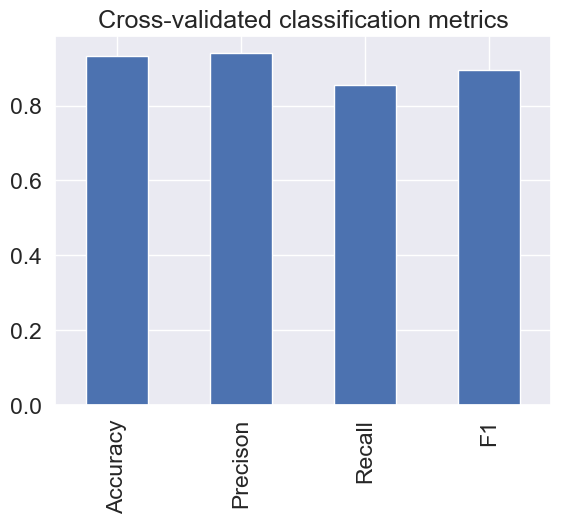

In [73]:
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                        "Precison": cv_precision,
                        "Recall": cv_recall,
                        "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);
plt.show();

<img src="images/cv_metrics.png"/>

In [74]:
clf=RandomForestClassifier(n_estimators=50,
                           max_depth= None,
                           max_features= 'sqrt',
                           min_samples_split= 5, 
                           random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

In [75]:
y_pred=clf.predict(X_test)

In [76]:
importances=clf.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.02473538 0.0035229  0.00619008 0.01077732 0.02523109 0.00223495
 0.02698336 0.02759111 0.02672752 0.02820208 0.00255026 0.00241923
 0.00301204 0.00342869 0.0020165  0.00269864 0.02165993 0.02002675
 0.02581617 0.02617155 0.02380704 0.02806151 0.13553523 0.20597593
 0.08125707 0.04412512 0.17475972 0.00222385 0.00295668 0.00353406
 0.00249635 0.00327189]


In [77]:
feature_importances=pd.DataFrame({'Feature': X.columns,
                                 'Importances': importances})
print(feature_importances)

                      Feature  Importances
0                         Age     0.024735
1                      Gender     0.003523
2                   Ethnicity     0.006190
3              EducationLevel     0.010777
4                         BMI     0.025231
5                     Smoking     0.002235
6          AlcoholConsumption     0.026983
7            PhysicalActivity     0.027591
8                 DietQuality     0.026728
9                SleepQuality     0.028202
10    FamilyHistoryAlzheimers     0.002550
11      CardiovascularDisease     0.002419
12                   Diabetes     0.003012
13                 Depression     0.003429
14                 HeadInjury     0.002017
15               Hypertension     0.002699
16                 SystolicBP     0.021660
17                DiastolicBP     0.020027
18           CholesterolTotal     0.025816
19             CholesterolLDL     0.026172
20             CholesterolHDL     0.023807
21   CholesterolTriglycerides     0.028062
22         

In [78]:
feature_importances= feature_importances.sort_values(by='Importances', ascending=False)

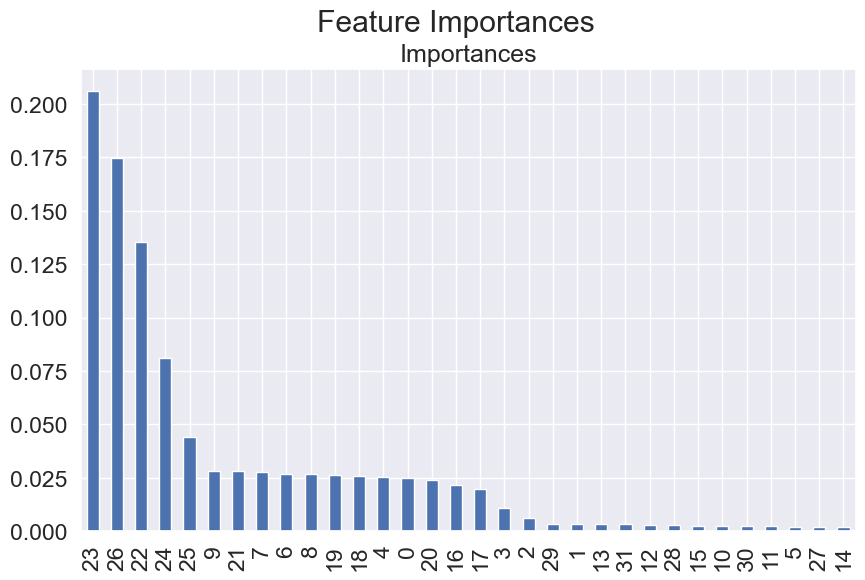

In [120]:
x= ['Feature']
feature_importances.plot.bar(figsize=(10, 6), subplots=True,
                            title="Feature Importances", legend=False);
plt.savefig('features.png');
plt.show();

In [80]:
threshold= 0.036
selected_features=feature_importances[feature_importances['Importances'] >= threshold]['Feature'].tolist()

In [81]:
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

In [82]:
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}



grid_search= GridSearchCV(estimator=rf,
                          param_grid=param_grid,
                          scoring=scoring,
                          refit='accuracy',
                          cv=5,
                          verbose=2,
                          n_jobs=-1,
                          error_score='raise')

grid_search.fit(X_train_selected, y_train)   # Use all available cores

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', average=macro),
                      'precision': make_scorer(precision_score, response_method='predict', average=macro),
                      'recall': make_scorer(recall_score, response_method='predict', average=macro)},
             verbose=2)

In [83]:
grid_search.score(X_test_selected, y_test)

0.9534883720930233

In [84]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [85]:
y_preds= grid_search.predict(X_test_selected)
print(len(y_preds))

430


In [86]:
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [87]:
y_test

1159    0
1822    0
978     0
759     0
874     0
       ..
1103    0
1991    0
445     1
548     0
25      0
Name: Diagnosis, Length: 430, dtype: int64

In [88]:
assert len(y_test)==len(y_preds)

In [89]:
best_model= grid_search.best_estimator_

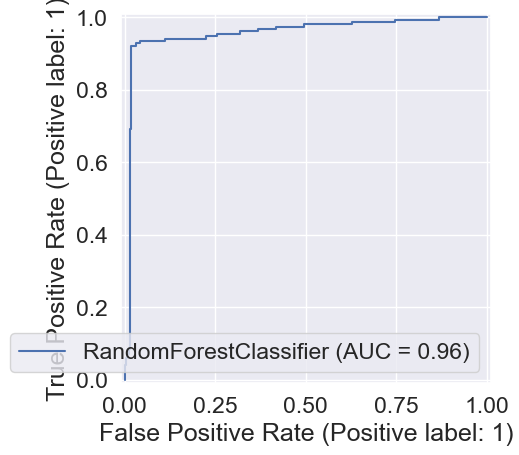

In [119]:
RocCurveDisplay.from_estimator(best_model, X_test_selected, y_test)

plt.savefig('roc_plot.png', transparent=True)
plt.show();

In [91]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[272   5]
 [ 15 138]]


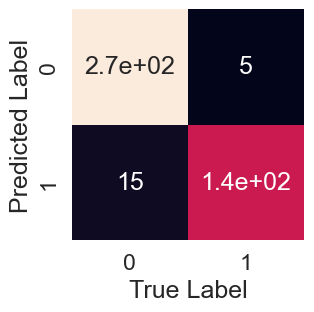

In [118]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax=plt.subplots(figsize=(3, 3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    #bottom, top=ax.get_ylim()
    #ax.set_ylim(bottom+0.5, top-0.5)
# I will need these above commented codes if the matrix didnt come out well

plot_conf_mat(y_test, y_preds)

plt.savefig('conf_plot.png', transparent=True)
plt.show();

In [93]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.97      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.96      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [94]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [95]:
clf=RandomForestClassifier(n_estimators=300,
                           max_depth= None,
                           max_features= 'sqrt',
                           min_samples_split= 10, 
                           random_state=42)

In [96]:
rf=RandomForestClassifier(random_state=42)

scoring={'accuracy':make_scorer(accuracy_score),
        'precision':make_scorer(precision_score, average='macro'),
        'recall':make_scorer(recall_score, average='macro'),
        'f1':make_scorer(f1_score, average='macro')}

cv_acc=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='accuracy')
cv_acc=np.mean(cv_acc)
cv_acc


np.float64(0.9315335826963734)

In [97]:
cv_precision=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='precision')

cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.9397751715217982)

In [98]:
cv_recall=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='recall')

cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.8552631578947368)

In [99]:
cv_f1=cross_val_score(estimator=rf,
                          X=X,
                          y=y,
                          cv=5,
                          scoring='f1')

cv_f1=np.mean(cv_f1)
cv_f1

np.float64(0.8941380146266364)

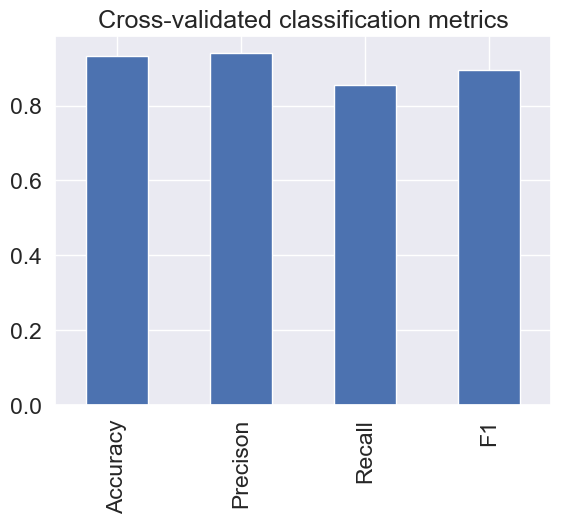

In [116]:
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                        "Precison": cv_precision,
                        "Recall": cv_recall,
                        "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);
plt.savefig('cv_metrics.png');plt.show();

In [101]:
clf=RandomForestClassifier(n_estimators=300,
                           max_depth= None,
                           max_features= 'sqrt',
                           min_samples_split= 10, 
                           random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=300, random_state=42)

In [102]:
y_preds= grid_search.predict(X_test_selected)
print(len(y_preds))

430


In [103]:
best_model= grid_search.best_estimator_

In [104]:
importances=best_model.feature_importances_

In [105]:
importances_df= pd.DataFrame({'feature':X_train_selected.columns, 'importances':best_model.feature_importances_}).sort_values(by='importances',ascending=False)

<Figure size 640x480 with 0 Axes>

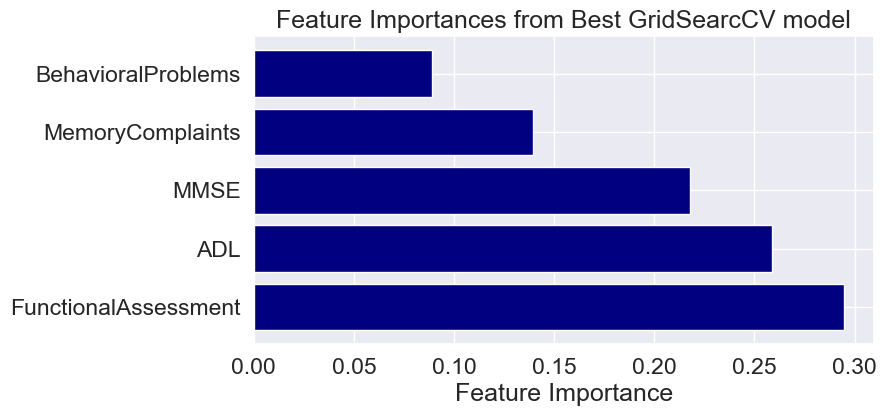

In [114]:
plt.figure(figsize=(8, 4))
plt.barh(importances_df['feature'], importances_df['importances'], color='navy')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Best GridSearcCV model')

plt.savefig('b_features.png');
plt.show();

In [107]:
from joblib import dump, load

In [108]:
model=grid_search.best_estimator_

In [109]:
import joblib
joblib.dump(model, 'alzheimers_model.pkl')

['alzheimers_model.pkl']

In [110]:
model= load('alzheimers_model.pkl')